In [10]:
import requests
import pandas as pd
from datetime import datetime, timezone
import time

## Get Series Information

In [11]:
series_ticker = "KXHIGHNY"
# Get series information for series_ticker
url = f"https://api.elections.kalshi.com/trade-api/v2/series/{series_ticker}"
response = requests.get(url)
series_data = response.json()

print(f"Series Title: {series_data['series']['title']}")
print(f"Frequency: {series_data['series']['frequency']}")
print(f"Category: {series_data['series']['category']}")

Series Title: Highest temperature in NYC
Frequency: daily
Category: Climate and Weather


## Get Today’s Events and Markets

In [12]:
# Get all open markets for the series_ticker series
markets_url = f"https://api.elections.kalshi.com/trade-api/v2/markets?series_ticker={series_ticker}&status=open"
markets_response = requests.get(markets_url)
markets_data = markets_response.json()

print(f"\nActive markets in {series_ticker} series:")
for market in markets_data["markets"]:
    print(f"- {market['ticker']}: {market['title']}")
    print(f"  Event: {market['event_ticker']}")
    print(
        f"  Yes Price: {market['yes_ask']}¢ | No Price: {market['no_ask']}¢ | Volume: {market['volume']}"
    )
    print()


Active markets in KXHIGHNY series:
- KXHIGHNY-26FEB13-T42: Will the **high temp in NYC** be >42° on Feb 13, 2026?
  Event: KXHIGHNY-26FEB13
  Yes Price: 2¢ | No Price: 99¢ | Volume: 939

- KXHIGHNY-26FEB13-T35: Will the **high temp in NYC** be <35° on Feb 13, 2026?
  Event: KXHIGHNY-26FEB13
  Yes Price: 3¢ | No Price: 98¢ | Volume: 3041

- KXHIGHNY-26FEB13-B41.5: Will the **high temp in NYC** be 41-42° on Feb 13, 2026?
  Event: KXHIGHNY-26FEB13
  Yes Price: 7¢ | No Price: 94¢ | Volume: 316

- KXHIGHNY-26FEB13-B39.5: Will the **high temp in NYC** be 39-40° on Feb 13, 2026?
  Event: KXHIGHNY-26FEB13
  Yes Price: 14¢ | No Price: 88¢ | Volume: 1329

- KXHIGHNY-26FEB13-B37.5: Will the **high temp in NYC** be 37-38° on Feb 13, 2026?
  Event: KXHIGHNY-26FEB13
  Yes Price: 50¢ | No Price: 51¢ | Volume: 4616

- KXHIGHNY-26FEB13-B35.5: Will the **high temp in NYC** be 35-36° on Feb 13, 2026?
  Event: KXHIGHNY-26FEB13
  Yes Price: 33¢ | No Price: 68¢ | Volume: 2387

- KXHIGHNY-26FEB12-T39: Will 

In [13]:
# Get details for a specific event if you have its ticker
if markets_data["markets"]:
    # Let's get details for the first market's event
    event_ticker = markets_data["markets"][0]["event_ticker"]
    event_url = f"https://api.elections.kalshi.com/trade-api/v2/events/{event_ticker}"
    event_response = requests.get(event_url)
    event_data = event_response.json()

    print(f"Event Details:")
    print(f"Title: {event_data['event']['title']}")
    print(f"Category: {event_data['event']['category']}")

Event Details:
Title: Highest temperature in NYC on Feb 13, 2026?
Category: Climate and Weather


## Get Orderbook Data

In [14]:
# Get orderbook for a specific market
# Replace with an actual market ticker from the markets list
if not markets_data["markets"]:
    raise ValueError(
        "No open markets found. Try removing status=open or choose another series."
    )

market_ticker = markets_data["markets"][0]["ticker"]
orderbook_url = (
    f"https://api.elections.kalshi.com/trade-api/v2/markets/{market_ticker}/orderbook"
)

orderbook_response = requests.get(orderbook_url)
orderbook_data = orderbook_response.json()

print(f"\nOrderbook for {market_ticker}:")
print("YES BIDS:")
for bid in orderbook_data["orderbook"]["yes"][:5]:  # Show top 5
    print(f"  Price: {bid[0]}¢, Quantity: {bid[1]}")

print("\nNO BIDS:")
for bid in orderbook_data["orderbook"]["no"][:5]:  # Show top 5
    print(f"  Price: {bid[0]}¢, Quantity: {bid[1]}")


Orderbook for KXHIGHNY-26FEB13-T42:
YES BIDS:
  Price: 1¢, Quantity: 807

NO BIDS:
  Price: 1¢, Quantity: 825
  Price: 3¢, Quantity: 100
  Price: 4¢, Quantity: 3
  Price: 6¢, Quantity: 115
  Price: 7¢, Quantity: 3


## Get Candlestick Data

In [15]:
ticker = market_ticker

In [16]:
today_midnight = datetime.now(timezone.utc).replace(
    hour=0, minute=0, second=0, microsecond=0
)

start_ts = int(today_midnight.timestamp())
now_ts = int(time.time())

In [20]:
candlesticks_url = f"https://api.elections.kalshi.com/trade-api/v2/series/{series_ticker}/markets/{ticker}/candlesticks?start_ts=1770854400&end_ts=1770914728&period_interval=1&include_latest_before_start=true"
historic_price = requests.get(candlesticks_url).json()["candlesticks"]

In [21]:
historic_price_dict = [
    {"ts": data_ts["end_period_ts"]} | data_ts["yes_ask"] for data_ts in historic_price
]

historic_price_df = pd.DataFrame.from_dict(historic_price_dict)
historic_price_df["ts"] = pd.to_datetime(
    historic_price_df["ts"],
    unit="s",
)

<Axes: xlabel='ts'>

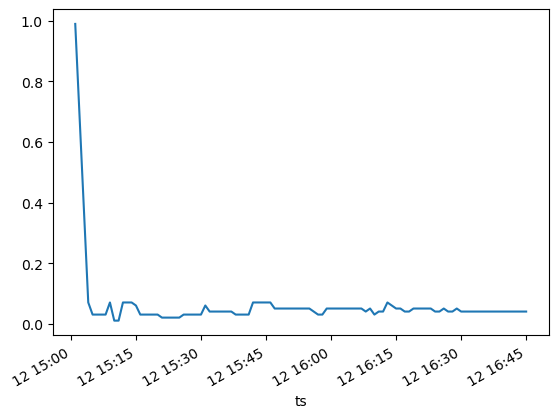

In [22]:
historic_price_df.set_index("ts")["high_dollars"].astype(float).plot()